### Here's the start of our Python script. Thanks for completing it for me! - Dr. X
### IMPORTANT: install BioPython so that this will work

#### Description

This python notebook takes input data (`bears_cytb.fasta`, `bears_mass.csv`) and translates the input fasta then calculates molecular weight of the protein produced and the GC content then adds it to the table containing bear mass and species ID. Finally it graphs the mass by species, the GC content by species and the molecular weight by GC content. 

#### Dependencies

To run this notebook you will need these files included in the git repository:

`bears_mass.csv`

`bears_cytb.fasta`

You will also need to download and install the following packages:

##### Biopython
##### pandas
##### matplotlib

#### Authors

Kaitlin Higgins
Dr. X

#### Date

May 4th 2021


In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

### 1 ###

### Get_sequences_from_file function

#### Description

The following code takes your fasta file as the argument `fasta_fn` then parses through it to pull out the `species_name` and the associated sequence(`record.seq`) and deposit into a new dictionary `sequence_data_dict` which uses the species names as keys

#### Parameters

- `fasta_fn` : your fasta file

#### Return: 
extracted sequences with species names as indices

#### Example of Usage

    > `fasta_seqs = get_sequences_from_file(fasta_fn)`

#### Output
"species" Seq(ATG...)

In [2]:
def get_sequences_from_file(fasta_fn): 
    sequence_data_dict = {} 
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2] 
        sequence_data_dict[species_name] = record.seq 
    return(sequence_data_dict)

## 2 ##
### Translate function

#### Description 
The following code pulls the mitochondrial table from Bio.Data then uses the input `string_nucleotides` to get each group of 3 nucleotides and compare them to the codon table to get the protein code and append each to the end of the string, it then returns the sequence. 

#### Parameters

- `string_nucleotides`: The nucleotide sequences you'd like to translate
- `mito_table` : The codon table used for translation

#### Return:

amino acid sequence

#### Example of Usage

    > `aa_seq = translate(ATGTCTUGG)`

#### Output

MSW

In [3]:
 def translate(string_nucleotides): 
     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
     for n in range(0, len(string_nucleotides), 3):
            if string_nucleotides[n:n+3] in mito_table:
                aa_seq_string += mito_table[string_nucleotides[n:n+3]]
            return(aa_seq_string)

## 3 ##
### Better translate function


There is an alternative function to do the above that is included in Bio.Seq (http://biopython.org/DIST/docs/tutorial/Tutorial.pdf), it also gives you easy to use options to allow alternate start codons (`cds=True`), set the codon table (`table=2`) and stop translating when it reaches a stop codon(`to_stop=True`)

#### Parameters

- `nucleotides`: The nucleotide sequences you'd like to translate
- `table` : The codon table used for translation

#### Return:

 amino acid sequence

#### Example of Usage

    > `aa_seq = better_translate(ATGTCTUGG)`

#### Output

MSW

In [4]:
def better_translate(nucleotides):
    aa_seq = nucleotides.translate(table=2, to_stop=True, cds=True)
    return(aa_seq)

## 4 ##
### Compute Molecular Weight Function

#### Description
This function calculates the molecular weight of proteins found in the translate function. It uses the strings generated in the translate function as input(`aa_seq`) and returns the protein weight(`prot_weight`). Further documentation can be found here: https://biopython.org/wiki/ProtParam 

The ProteinAnalysis module is required for this so be sure to import from Bio.SeqUtils.ProtParam

#### Parameters

- `aa_seq`: The amino acid sequence you would like to get the weight for

#### Return:

protein molecular weight

#### Example of Usage

        > `mol_weight = compute_molecular_weight(aa_seq)`

#### Output

molecular weight (ex: 98920.6083)

In [5]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [6]:
 def compute_molecular_weight(aa_seq):
        aa_string = str(value) #convert sequences to strings 
        analyzed_aa = ProteinAnalysis(aa_string)
        prot_weight = analyzed_aa.molecular_weight()
        return(prot_weight)

## 5 ##
### getGC function

#### Description
Biopython has a very useful function to get the GC content of a DNA sequence using the sequence as input, further documentation can be found here: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf

You'll want to ensure the GC function is available so be sure to import it from Bio.SeqUtils

#### Parameters

- `dna_seq` : the sequence you want to analyze for GC content

#### Return

The GC content as a percentage

#### Example of Usage

    >`GC_content = getGC(dna_seq)
    
#### Output

GC percentage (ex: 14.51)

In [11]:
from Bio.SeqUtils import GC 
#The following gets out data into the notebook to work with and creates a species list. 
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

#Set species as index
bears_df2 = bears_df.set_index('species')
bears_df2

,mass
species,
Ursus spelaeus,550.800
Ursus arctos,203.500
Ursus thibetanus,99.714
Melursus ursinus,100.030
Ursus americanus,110.560
Helarctos malayanus,47.020
Ailuropoda melanoleuca,118.200
Tremarctos ornatus,140.700
Ursus maritimus,425.100


In [14]:
def getGC(dna_seq):
    GC_cont = GC(dna_seq)
    return(GC_cont)

## 6 ## 

The following code creates a new dataframe from the bears_df dataframe and adds two additional columns with NaN as values using the `df.assign` function

In [12]:
bears_df2 = bears_df2.assign(molecular_weight = 'NaN', GC_content = 'NaN')
bears_df2

,mass,molecular_weight,GC_content
species,,,
Ursus spelaeus,550.800,NaN,NaN
Ursus arctos,203.500,NaN,NaN
Ursus thibetanus,99.714,NaN,NaN
Melursus ursinus,100.030,NaN,NaN
Ursus americanus,110.560,NaN,NaN
Helarctos malayanus,47.020,NaN,NaN
Ailuropoda melanoleuca,118.200,NaN,NaN
Tremarctos ornatus,140.700,NaN,NaN
Ursus maritimus,425.100,NaN,NaN


## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame

In this step we call in the previously created functions using `dataframe.loc[key, 'column_name'] = function()` to make sure the correct values are imported into the dataframe in the correct locations. We then call the dataframe to visually inspect and make sure there are no obvious errors. 

In [15]:
for key, value in cytb_seqs.items():
        aa_seq = better_translate(value)
        bears_df2.loc[key, 'molecular_weight'] = compute_molecular_weight(aa_seq)
        bears_df2.loc[key, 'GC_content'] = getGC(aa_seq)
bears_df2

,mass,molecular_weight,GC_content
species,,,
Ursus spelaeus,550.800,98920.6083,14.248021
Ursus arctos,203.500,98902.4375,13.984169
Ursus thibetanus,99.714,98850.9681,14.511873
Melursus ursinus,100.030,98780.7211,14.511873
Ursus americanus,110.560,98906.5155,14.511873
Helarctos malayanus,47.020,98868.5799,14.511873
Ailuropoda melanoleuca,118.200,98710.9023,14.511873
Tremarctos ornatus,140.700,98649.9109,14.775726
Ursus maritimus,425.100,98804.3175,14.248021


## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the largest bear species? 
    
        The Largest Species is Ursus Spelaeus
## *Q2* What else is interesting about this species?
    
        The GC content is is lower than the lowest mass species

For this part of the code we first need to reset the indices so that species is a plottable column again. We do this using 

`df=df.reset_index()`

We then import matplotlib as well as its colormaps and set the variable color equal to a color map and specify the number of bins using:

`color = cm.inferno_r(np.linspace(.4,.8,10))`

The color step is unnecessary for getting the data plotted but does make it look more appealing

Finally we plot this data using 

`df.plot(kind='bar', x= 'species, y='mass', legend=False, color=color)`

In that code we are specifying which columns to use for the x and y axis, and telling it we don't need a legend so that the colors will be different from bar to bar. 

More details on visualization can be found here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [ ]:
bears_df2 = bears_df2.reset_index()

In [46]:
import matplotlib as plt
from matplotlib import cm 
color = cm.inferno_r(np.linspace(.4,.8,10))
%matplotlib inline

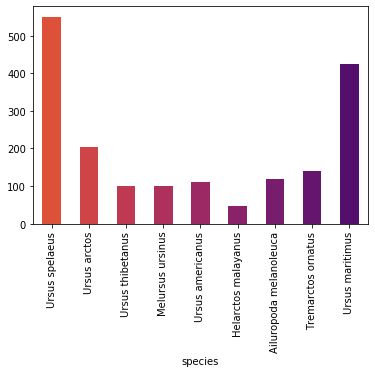

In [49]:
bears_df2.plot(kind= 'bar',x= 'species' , y= 'mass', legend=False, color= color)

## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

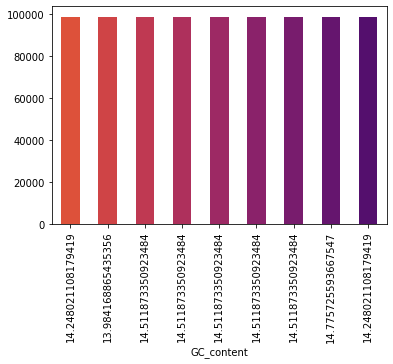

In [55]:
bears_df2.plot(kind= 'bar',x= 'GC_content' , y= 'molecular_weight', legend=False, color= color)


## 10 ##
## Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [56]:
bears_df2.to_csv('bears_mass_cytb.csv')

## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)

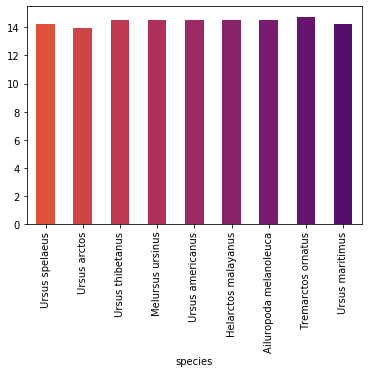

In [57]:
bears_df2.plot(kind= 'bar',x= 'species' , y= 'GC_content', legend=False, color= color)